Week 07 Assignment (Exercise 2) <br>
Submitted by: Chris Panican<br>
Intro to Machine Learning CSc 55929<br>
Prof. Erik Grimmelmann<br>

In [1]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [0,1,2,3]]
y = iris.target

# Gini Impurity

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [4]:
# Fit for various depth trees
MaxDepth = 8
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=i+1, random_state=0)
    tree.fit(X_train, y_train)

    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
    
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])


Max Depth, Training, Test
1 0.33333333333333337 0.33333333333333337
2 0.053333333333333344 0.040000000000000036
3 0.053333333333333344 0.040000000000000036
4 0.040000000000000036 0.013333333333333308
5 0.013333333333333308 0.040000000000000036
6 0.0 0.026666666666666616
7 0.0 0.026666666666666616
8 0.0 0.026666666666666616


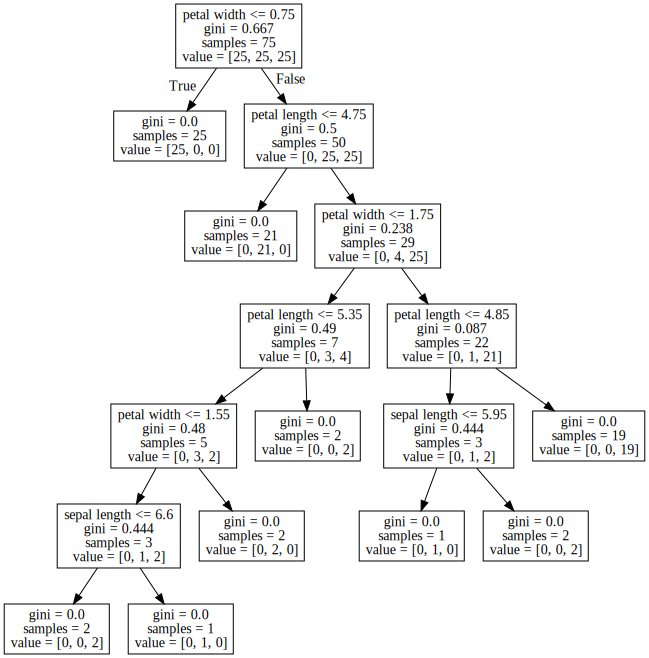

In [5]:
# plot the final decision gree
export_graphviz(tree, out_file='iris1.dot', feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'])
with open('iris1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

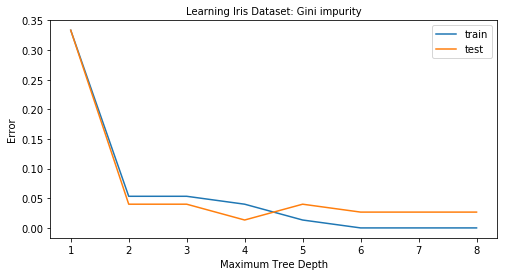

In [6]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset: Gini impurity', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

# Entropy Impurity

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [8]:
# Fit for various depth trees
MaxDepth = 8
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X_train, y_train)

    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
    
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])


Max Depth, Training, Test
1 0.33333333333333337 0.33333333333333337
2 0.053333333333333344 0.040000000000000036
3 0.053333333333333344 0.040000000000000036
4 0.053333333333333344 0.040000000000000036
5 0.026666666666666616 0.040000000000000036
6 0.013333333333333308 0.026666666666666616
7 0.013333333333333308 0.040000000000000036
8 0.0 0.040000000000000036


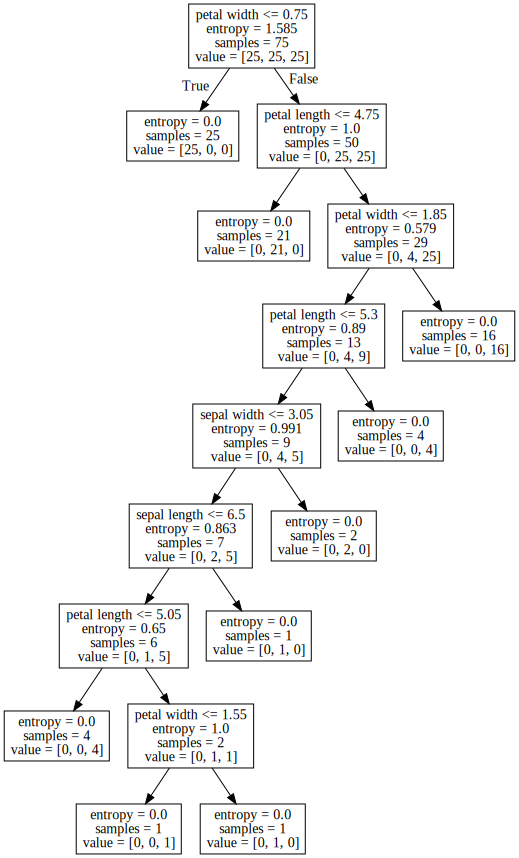

In [9]:
# plot the final decision gree
export_graphviz(tree, out_file='iris2.dot', feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'])
with open('iris2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

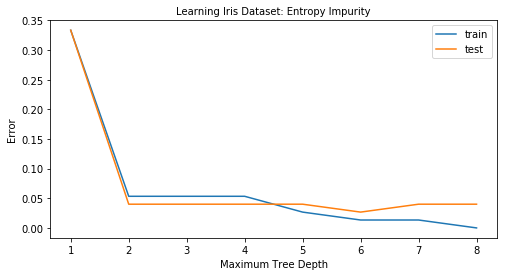

In [10]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset: Entropy Impurity', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

# Discussion

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :4]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=1, stratify=y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)

In [ ]:
Without AdaBoost Model